In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file = 'c2e1results.csv'
df = pd.read_csv(file)

df.head()

,Index,Speaker,Section,Scene,Category,Character,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,142,SAM,Part One,1,Dialogue,NOTT,"Oh! You're finally awake, I see.",6,surprise,0.877123,0.029428,0.018477,0.004126,0.034323,0.031333,0.005189,0.877123
1,144,SAM,Part One,1,Dialogue,NOTT,"You were out for quite some time, there. Rough...",4,neutral,0.802743,0.010214,0.079111,0.060549,0.007528,0.802743,0.030531,0.009323
2,145,LIAM,Part One,1,Dialogue,CALEB,"Not our best day, no.",5,sadness,0.581246,0.031540,0.079213,0.259437,0.003840,0.041202,0.581246,0.003522
3,146,SAM,Part One,1,Dialogue,NOTT,"No, I mean, usually you're so good at everythi...",4,neutral,0.775355,0.035300,0.117252,0.037986,0.008865,0.775355,0.015268,0.009973
4,147,LIAM,Part One,1,Dialogue,CALEB,Thank you.,4,neutral,0.674990,0.029117,0.015293,0.015141,0.237564,0.674990,0.009810,0.018085


In [3]:
vad_scores = {
    "anger": np.array([-0.43, 0.67, 0.34]),
    "joy": np.array([0.76, 0.48, 0.35]),
    "surprise": np.array([0.4, 0.67, -0.13]),
    "disgust": np.array([-0.6, 0.35, 0.11]),
    "fear": np.array([-0.64, 0.6, -0.43]),
    "sadness": np.array([-0.63, 0.27, -0.33]),
}

emotion_columns = ["anger", "joy", "surprise", "disgust", "fear", "sadness"]

In [4]:
def calculate_weighted_vad(row, vad_scores, emotion_columns):

    weighted_vad = np.zeros(3)

    for emotion in emotion_columns:
        weighted_vad += row[emotion] * vad_scores[emotion]

    return weighted_vad


In [5]:
df["weighted_vad"] = df.apply(calculate_weighted_vad, axis=1, args=(vad_scores, emotion_columns))
df[["text", "weighted_vad"]].head()

,text,weighted_vad
0,"Oh! You're finally awake, I see.","[0.34728502656999993, 0.6342082620299999, -0.0..."
1,"You were out for quite some time, there. Rough...","[-0.10039404137499999, 0.08896522762, -0.02251..."
2,"Not our best day, no.","[-0.5889876243159999, 0.365657874152, -0.28304..."
3,"No, I mean, usually you're so good at everythi...","[-0.10873385381, 0.10254064538999999, 0.005333..."
4,Thank you.,"[0.15021594365000002, 0.16274194829000002, 0.0..."


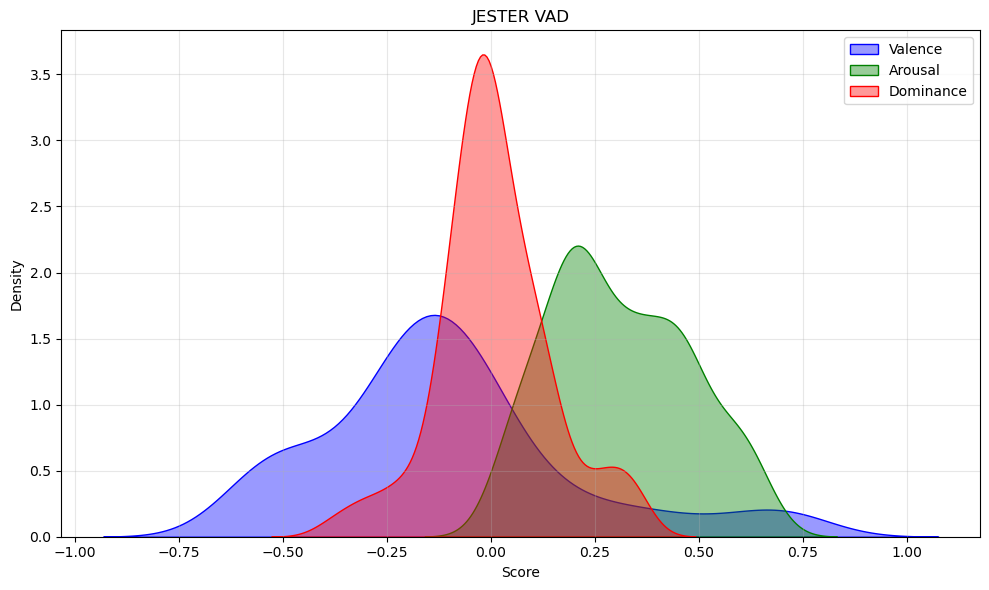

In [6]:
# JESTER
jester_data = df[df["Character"] == "JESTER"]

vad_values = np.array(jester_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.ylabel("Density")
plt.title("JESTER VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/jester_VAD.png")

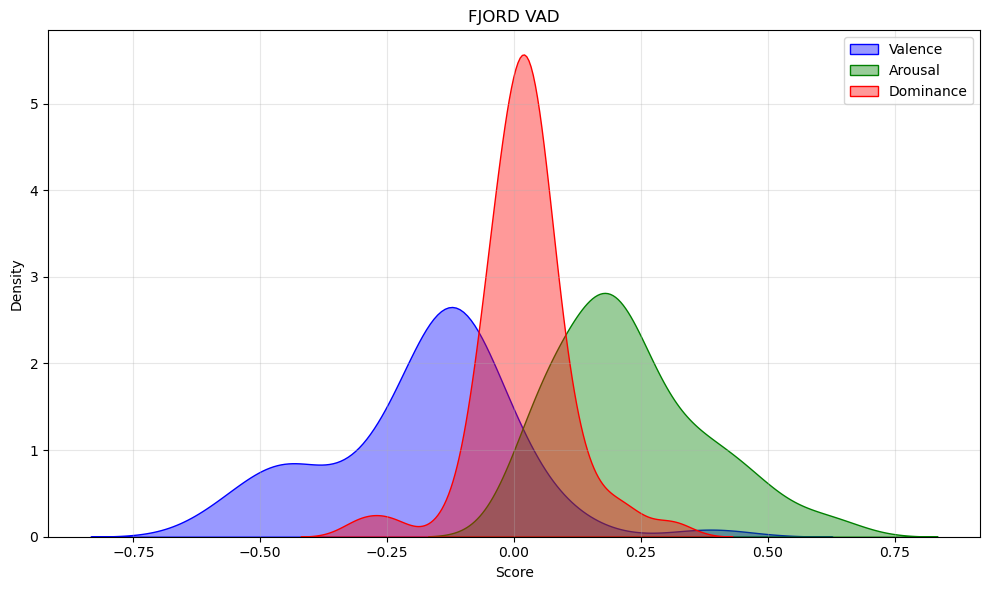

In [8]:
# FJORD
fjord_data = df[df["Character"] == "FJORD"]

vad_values = np.array(fjord_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.ylabel("Density")
plt.title("FJORD VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/fjord_VAD.png")

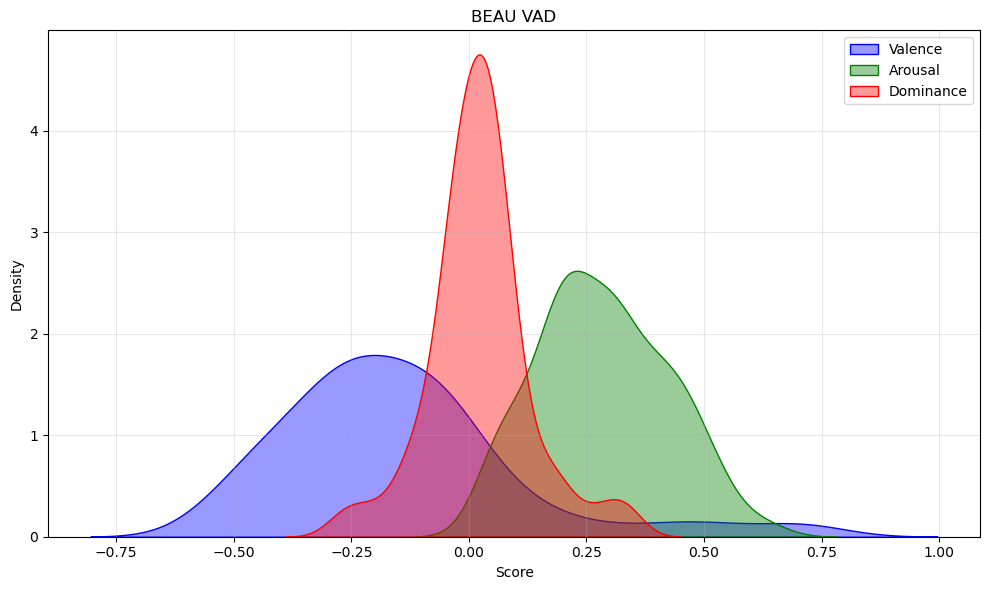

In [13]:
# BEAU
beau_data = df[df["Character"] == "BEAU"]

vad_values = np.array(beau_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.ylabel("Density")
plt.title("BEAU VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/beau_VAD.png")

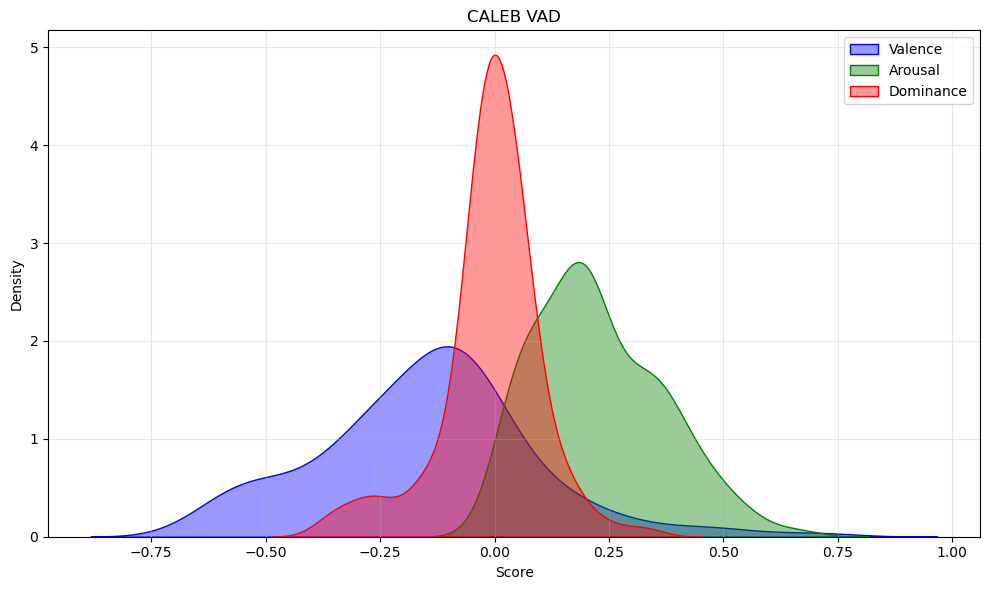

In [10]:
# CALEB
caleb_data = df[df["Character"] == "CALEB"]

vad_values = np.array(caleb_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.ylabel("Density")
plt.title("CALEB VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/caleb_VAD.png")

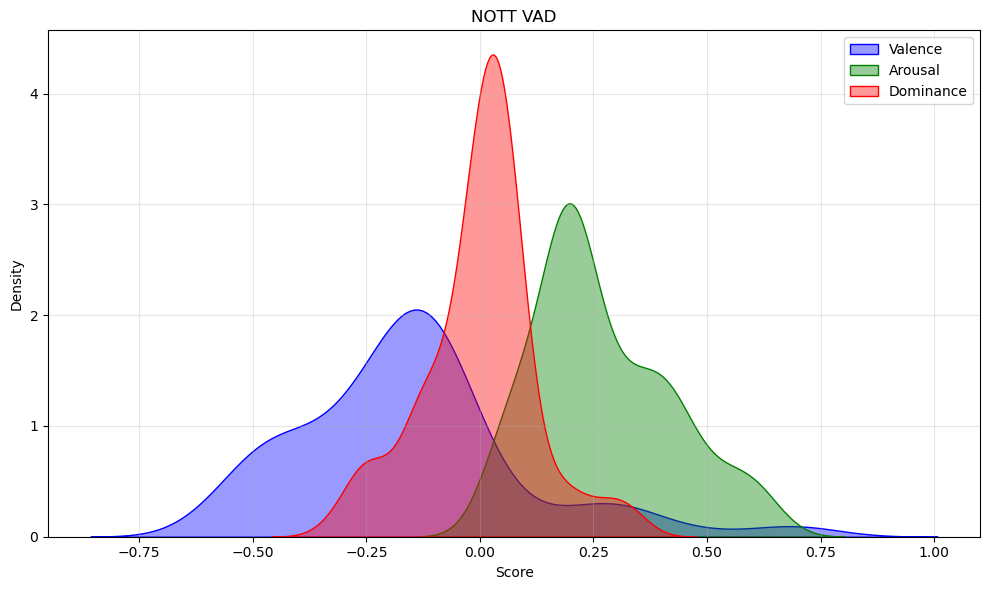

In [12]:
# NOTT
nott_data = df[df["Character"] == "NOTT"]

vad_values = np.array(nott_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.ylabel("Density")
plt.title("NOTT VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/nott_VAD.png")

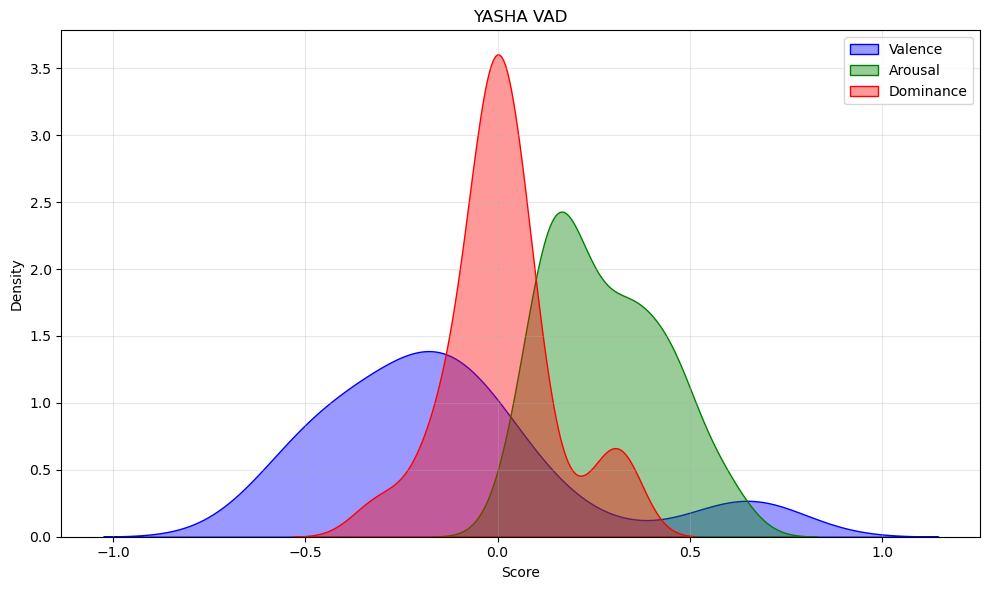

In [14]:
# YASHA
yasha_data = df[df["Character"] == "YASHA"]

vad_values = np.array(yasha_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.ylabel("Density")
plt.title("YASHA VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/yasha_VAD.png")

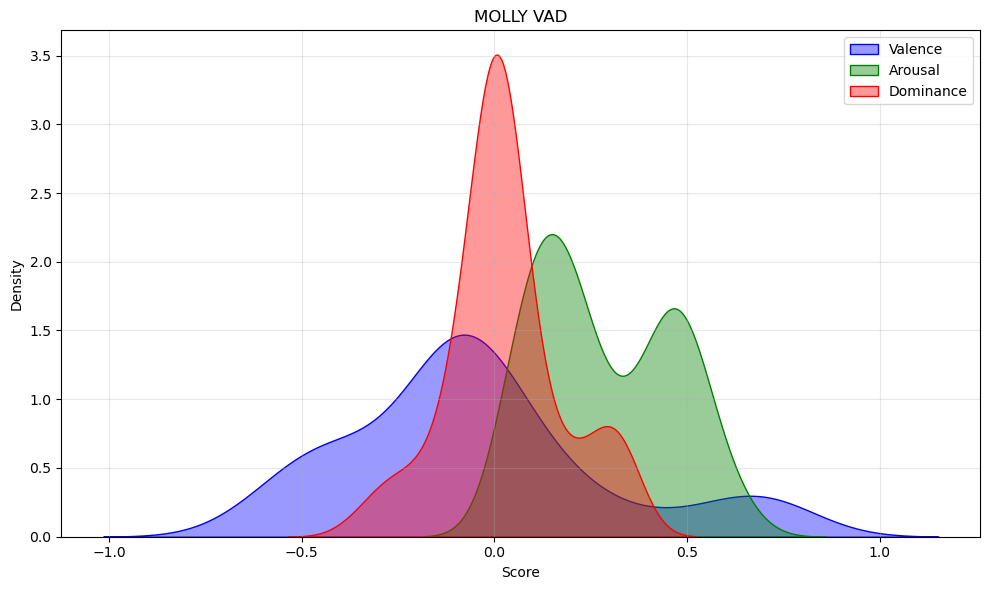

In [ ]:
# MOLLY
molly_data = df[df["Character"] == "MOLLY"]

vad_values = np.array(molly_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.ylabel("Density")
plt.title("MOLLY VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

#plt.savefig("figures/molly_VAD.png")